In [335]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import datetime
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import h5py
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.font_manager import FontProperties
%matplotlib inline

# 1.Loading Data

In [336]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_store = pd.read_csv('store.csv')

c:\python3.6.7\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 2. Exploring Data

In [337]:
print("Total train data points : ",len(df_train))
print("Total test data points : ",len(df_test))
print("Total store : ",len(df_store))

Total train data points :  1017209
Total test data points :  41088
Total store :  1115


## 2.1 Training Data

In [338]:
df_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [339]:
print("Count of missing values:\n",df_train.isnull().sum().sort_values(ascending=False),"\n")
print("Structure of Store:\n",df_train.shape, "\n")

Count of missing values:
 SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64 

Structure of Store:
 (1017209, 9) 



In [340]:
# %% Summary Table

feature_percent_missing = df_train.isnull().sum()*100/len(df_train)
feature_data_type = df_train.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2), 
                               "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Store,0.0,int64
DayOfWeek,0.0,int64
Date,0.0,object
Sales,0.0,int64
Customers,0.0,int64
Open,0.0,int64
Promo,0.0,int64
StateHoliday,0.0,object
SchoolHoliday,0.0,int64


## 2.2 Test Data 

In [341]:
df_test.head(2)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [342]:
print("Count of missing values:\n",df_test.isnull().sum().sort_values(ascending=False),"\n")
print("Structure of Store:\n",df_test.shape, "\n")

Count of missing values:
 Open             11
SchoolHoliday     0
StateHoliday      0
Promo             0
Date              0
DayOfWeek         0
Store             0
Id                0
dtype: int64 

Structure of Store:
 (41088, 8) 



In [343]:
feature_percent_missing = df_test.isnull().sum()*100/len(df_test)
feature_data_type = df_test.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2), 
                               "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Id,0.00,int64
Store,0.00,int64
DayOfWeek,0.00,int64
Date,0.00,object
Open,0.03,float64
Promo,0.00,int64
StateHoliday,0.00,object
SchoolHoliday,0.00,int64


## 2.3 Store Data 

In [344]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [345]:
print("Count of missing values:\n",df_store.isnull().sum().sort_values(ascending=False),"\n")
print("Structure of Store:\n",df_store.shape, "\n")

Count of missing values:
 PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
CompetitionDistance            3
Promo2                         0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64 

Structure of Store:
 (1115, 10) 



In [346]:
feature_percent_missing = df_store.isnull().sum()*100/len(df_store)
feature_data_type = df_store.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2), 
                               "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Store,0.00,int64
StoreType,0.00,object
Assortment,0.00,object
CompetitionDistance,0.27,float64
CompetitionOpenSinceMonth,31.75,float64
CompetitionOpenSinceYear,31.75,float64
Promo2,0.00,int64
Promo2SinceWeek,48.79,float64
Promo2SinceYear,48.79,float64
PromoInterval,48.79,object


In [347]:



# Make datetypes constant for all datasets
df_train['Date'] = pd.to_datetime(df_train['Date'], format="%Y-%m-%d")
df_test['Date'] = pd.to_datetime(df_test['Date'], format="%Y-%m-%d")



# 3. Joining Tables

In [348]:
# combined data of train and test with store data
combined_train = pd.merge(df_train, df_store, how="left", on="Store")
combined_test = pd.merge(df_test, df_store, how="left", on="Store")

In [349]:
combined_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [350]:
combined_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


# 4. Data Preprocessing

## 4.1 Replacing nan value by 0

In [351]:
processed_train = combined_train.fillna(0)
processed_test = combined_test.fillna(0)

##  4.2 Perform one hot encoding for categorical and boolean data 

In [352]:
# Check the datatype of all variables in processed_train and processed_test

print(processed_train.dtypes, processed_test.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open              

In [353]:
cat_col = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [354]:
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(processed_train[col].values.astype('str'))
    processed_train[col] = lbl.transform(processed_train[col].values.astype('str'))

In [355]:
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(processed_test[col].values.astype('str'))
    processed_test[col] = lbl.transform(processed_test[col].values.astype('str'))

In [356]:
processed_train = processed_train[processed_train['Store']==1]
processed_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1115,1,4,2015-07-30,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2230,1,3,2015-07-29,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3345,1,2,2015-07-28,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
4460,1,1,2015-07-27,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
5575,1,7,2015-07-26,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
6690,1,6,2015-07-25,4364,500,1,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
7805,1,5,2015-07-24,3706,459,1,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
8920,1,4,2015-07-23,3769,503,1,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
10035,1,3,2015-07-22,3464,463,1,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0


In [357]:
processed_test = processed_test[processed_test['Store']==1]
processed_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
856,857,1,3,2015-09-16,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1712,1713,1,2,2015-09-15,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2568,2569,1,1,2015-09-14,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3424,3425,1,7,2015-09-13,0.0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0


In [358]:
processed_train = processed_train[['Store', 'DayOfWeek', 'Date','Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Sales']]

# 5. Baseline Model

In [359]:
import keras
from sklearn.preprocessing import MinMaxScaler

In [360]:
# %% Check the date range in processed_train to perform train-val-test split
print(processed_train['Date'].min(), processed_train['Date'].max())

2013-01-01 00:00:00 2015-07-31 00:00:00


In [361]:
# %% Split train set into train-dev set
split_date = pd.datetime(2014,8,24)
train_set = processed_train.loc[processed_train['Date'] <= split_date]
dev_set = processed_train.loc[processed_train['Date'] > split_date]

In [362]:
# %% Split dev set into validation and test set
split_date_dev = pd.datetime(2015,2,25)
val_set = dev_set.loc[dev_set['Date'] <= split_date_dev]
test_set = dev_set.loc[dev_set['Date'] > split_date_dev]

In [363]:
train_set = train_set.set_index('Date')
val_set = val_set.set_index('Date')
test_set = test_set.set_index('Date')
train_set = pd.DataFrame(train_set[train_set['Store']==1])
train_set

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
Date,,,,,,,,,,,,,,,,,
2014-08-24,1,7,0,0,0,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0
2014-08-23,1,6,469,1,0,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3582
2014-08-22,1,5,461,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3971
2014-08-21,1,4,484,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4327
2014-08-20,1,3,467,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4280
2014-08-19,1,2,528,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5190
2014-08-18,1,1,598,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5623
2014-08-17,1,7,0,0,0,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0
2014-08-16,1,6,544,1,0,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4425


In [364]:
train_set_array = train_set.iloc[:,:].values
val_set_array = val_set.iloc[:,:].values
test_set_array = test_set.iloc[:,:].values

print("Shape of train, val and test array:\n",train_set_array.shape,"\n",val_set_array.shape,"\n",test_set_array.shape)
train_set_array

Shape of train, val and test array:
 (601, 17) 
 (185, 17) 
 (156, 17)


array([[1.000e+00, 7.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 6.000e+00, 4.690e+02, ..., 0.000e+00, 0.000e+00,
        3.582e+03],
       [1.000e+00, 5.000e+00, 4.610e+02, ..., 0.000e+00, 0.000e+00,
        3.971e+03],
       ...,
       [1.000e+00, 4.000e+00, 5.780e+02, ..., 0.000e+00, 0.000e+00,
        4.327e+03],
       [1.000e+00, 3.000e+00, 6.680e+02, ..., 0.000e+00, 0.000e+00,
        5.530e+03],
       [1.000e+00, 2.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [365]:
# Scaling
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set_array[:,:])
val_set_scaled = sc.fit_transform(val_set_array[:,:])
test_set_scaled = sc.fit_transform(test_set_array[:,:])

print(train_set_scaled.shape, val_set_scaled.shape, test_set_scaled.shape)

(601, 17) (185, 17) (156, 17)


In [366]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

X_train, y_train = train_set_scaled[:,:-1], train_set_scaled[:,-1]
X_val, y_val = val_set_scaled[:,:-1], val_set_scaled[:,-1]
X_test, y_test = test_set_scaled[:,:-1], test_set_scaled[:,-1]

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(601, 16) (601,) (185, 16) (185,) (156, 16) (156,)


In [367]:
# Create data structure

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [368]:
print(X_train.shape, X_val.shape, X_test.shape)

(601, 1, 16) (185, 1, 16) (156, 1, 16)


# Time series with CNN

|Input,                 |						Predict |
|-----------------------|-------------------------------|
|[Week1]                |						Week2   |
|[Week1 + Week2]        |				        Week3   |
|[Week1 + Week2 + Week3]|		                Week4   |

In [249]:
# univariate multi-step cnn
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [309]:
# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-59], data[-59:-3]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test

In [310]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [311]:
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

In [312]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, -1]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, -1])
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [330]:
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 200, 50
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(Conv1D(filters=100, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(MaxPooling1D(pool_size=4))
	model.add(Flatten())
	model.add(Dense(50, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [331]:
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, -1]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [332]:
# evaluate a single model
def evaluate_model(train, test, n_input):
    # fit model
    model = build_model(train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    print("pridiction : ", predictions)
    
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    
    plt.subplots(figsize=(60,25))
    plt.plot(test[:, :, -1][0],color='red',label='Real weekly sales')
    plt.plot(predictions[0],color='blue',label='Predicted weekly sales')
    plt.title('Sales', fontsize=40)
    plt.xlabel('Time', fontsize=80)
    plt.ylabel('Sales', fontsize=80)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),
             prop = fontP,fancybox=True,shadow=False)

    plt.show()
    return score, scores

In [333]:
# split into train and test
#datacnn = train_set[train_set['Store']==1]
#print(len(datacnn))
train, test = split_dataset(processed_train.values)

train

array([[[1, 4, Timestamp('2015-07-30 00:00:00'), ..., 0.0, 0, 5020],
        [1, 3, Timestamp('2015-07-29 00:00:00'), ..., 0.0, 0, 4782],
        [1, 2, Timestamp('2015-07-28 00:00:00'), ..., 0.0, 0, 5011],
        ...,
        [1, 7, Timestamp('2015-07-26 00:00:00'), ..., 0.0, 0, 0],
        [1, 6, Timestamp('2015-07-25 00:00:00'), ..., 0.0, 0, 4364],
        [1, 5, Timestamp('2015-07-24 00:00:00'), ..., 0.0, 0, 3706]],

       [[1, 4, Timestamp('2015-07-23 00:00:00'), ..., 0.0, 0, 3769],
        [1, 3, Timestamp('2015-07-22 00:00:00'), ..., 0.0, 0, 3464],
        [1, 2, Timestamp('2015-07-21 00:00:00'), ..., 0.0, 0, 3558],
        ...,
        [1, 7, Timestamp('2015-07-19 00:00:00'), ..., 0.0, 0, 0],
        [1, 6, Timestamp('2015-07-18 00:00:00'), ..., 0.0, 0, 4406],
        [1, 5, Timestamp('2015-07-17 00:00:00'), ..., 0.0, 0, 4852]],

       [[1, 4, Timestamp('2015-07-16 00:00:00'), ..., 0.0, 0, 4427],
        [1, 3, Timestamp('2015-07-15 00:00:00'), ..., 0.0, 0, 4767],
        [1

In [322]:
#print(len(train_set.values))
train, test = processed_train.values[1:-59], processed_train.values[-59:-3]
# restructure into windows of weekly data
x = len(train)/7
n = len(train)/x
print(len(train), x, n)
y = len(test)/7
z = len(test)/y
print(len(test), y, z)
#train = array(split(train, abs(len(train)/7)))
#test = array(split(test, abs(len(test)/7)))

882 126.0 7.0
56 8.0 7.0


pridiction :  [[3713.2056  4727.582   5325.933   4891.6733   955.1388  5568.8325
  6020.4673 ]
 [5181.8735  5055.333   4985.6123  7038.87    -647.7055  5567.86
  4598.0757 ]
 [4854.259   5297.1665  5657.867   6030.882   -305.67157 5960.9224
  5482.783  ]
 [4895.5664  5043.728   5114.6445  6277.977   -779.7668  5370.517
  4463.892  ]
 [4341.4727  4990.003   5351.9116  5281.4893   185.869   5829.6787
  5701.6904 ]
 [5616.2754  5395.989   5330.076   7519.1685  -832.59235 5864.3384
  4682.8877 ]
 [4491.7383  4905.091   4857.1655  5644.2427   223.9287  5553.381
  5227.9473 ]
 [4093.3645  4326.0454  4666.747   5105.8574  -526.8319  4723.479
  4186.222  ]]


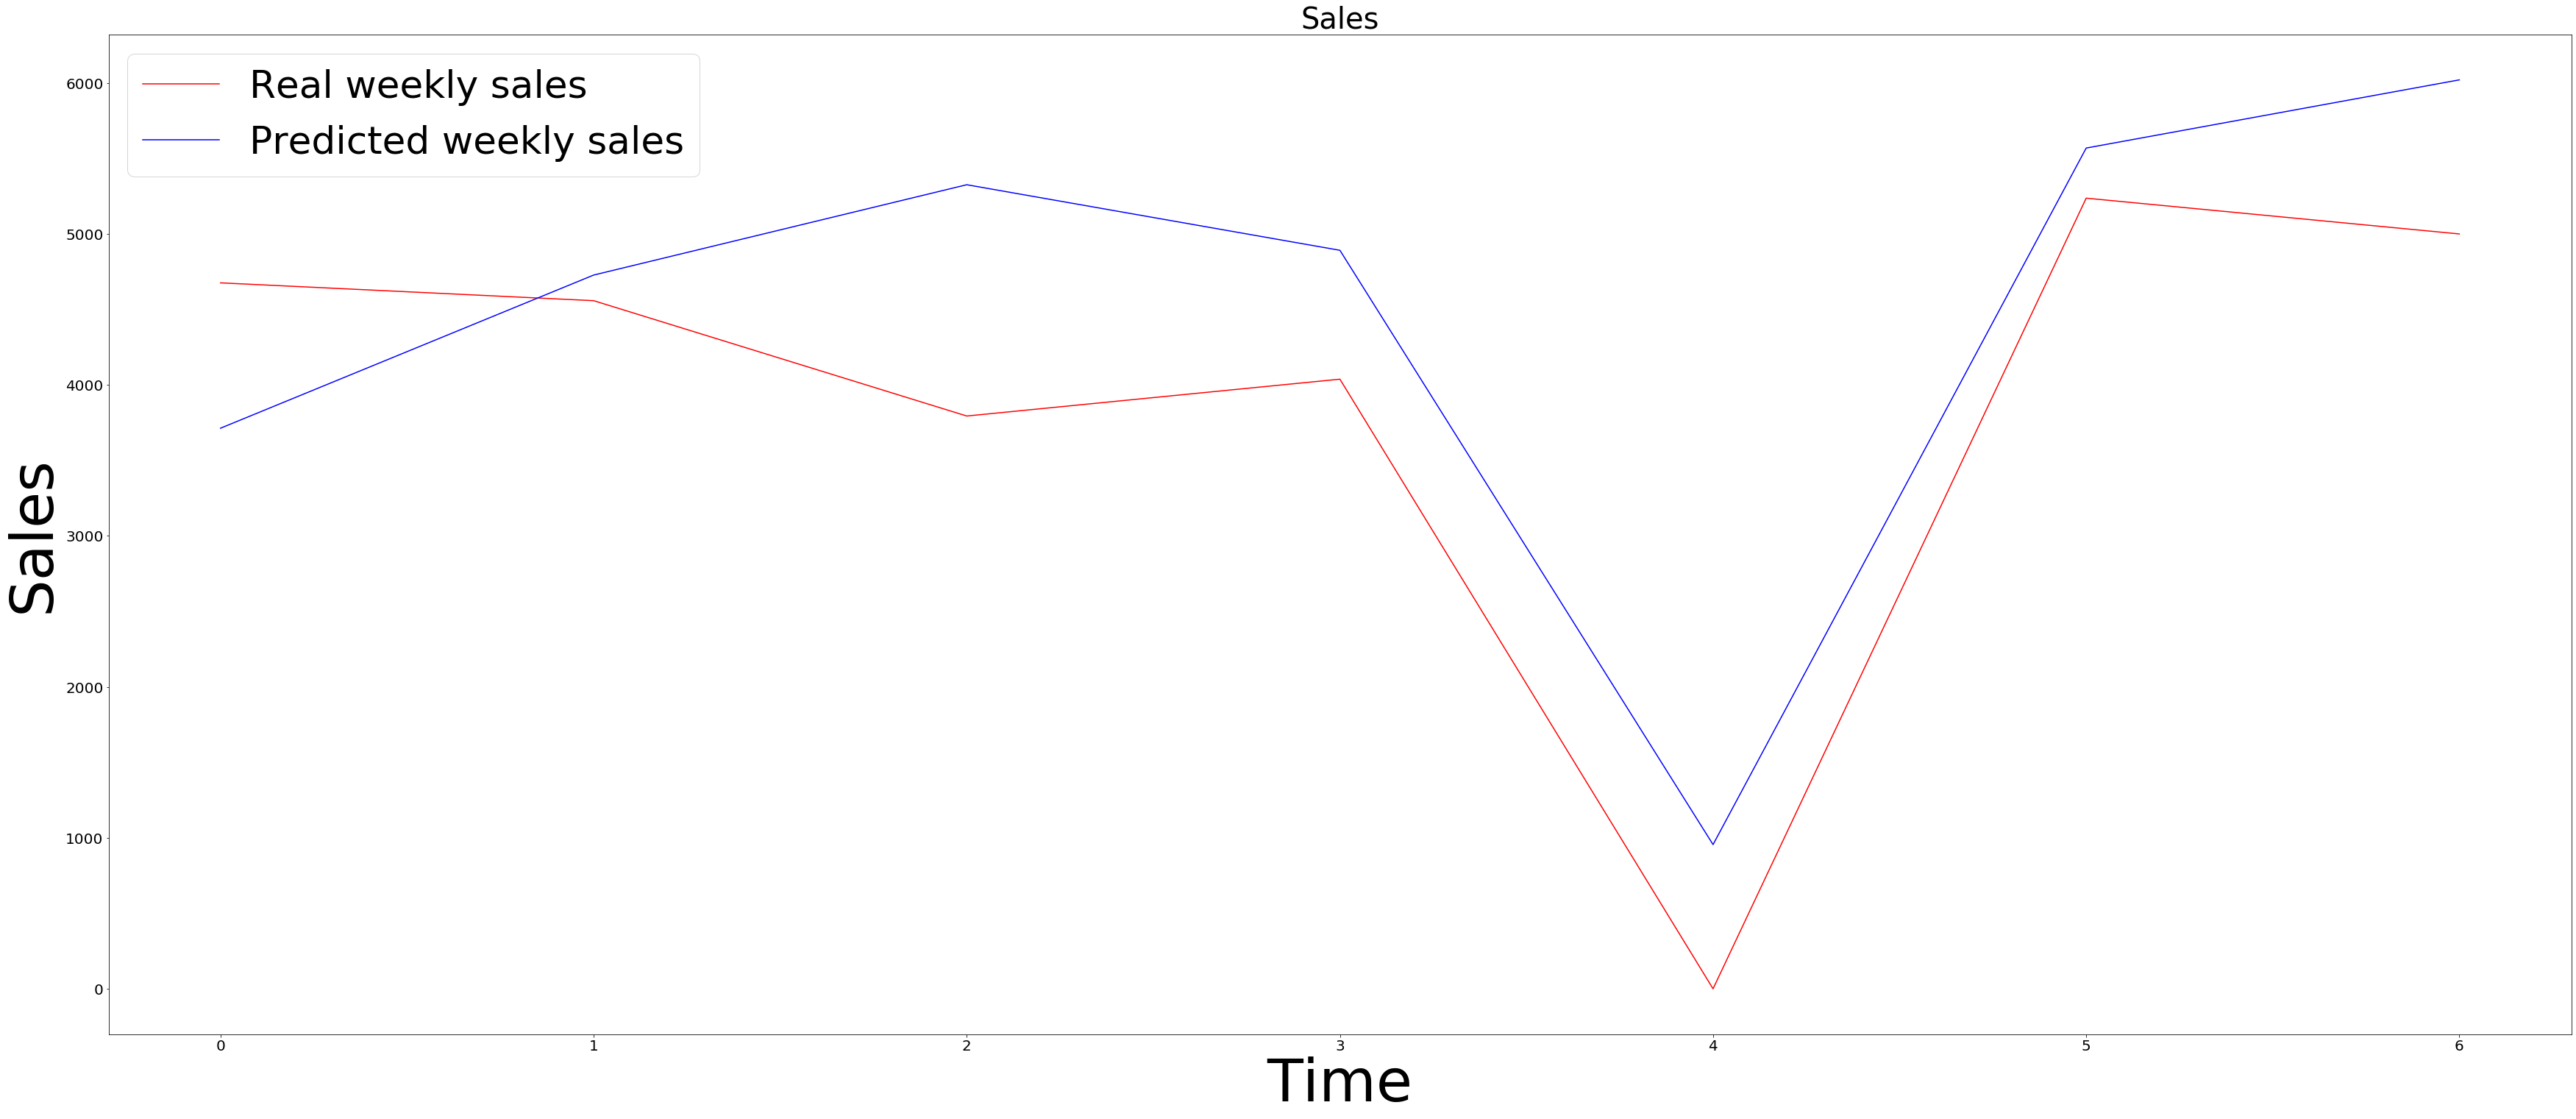

cnn: [4884.924] 4682.7, 4976.4, 5168.8, 6036.6, 621.7, 5565.8, 5081.7


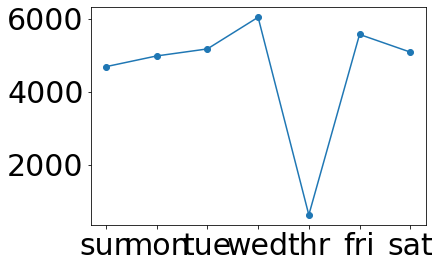

In [334]:
# evaluate model and get scores
n_input = 7
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('cnn', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='cnn')
pyplot.show()

# Time Series Analysis With LSTM

In [136]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

In [209]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(LSTM(units = 100, return_sequences = True, activation = 'relu', input_shape = (X_train.shape[1], 16)))
    model.add(Dropout(0.5))
    # adding a second LSTM layer and some dropout regularization
    model.add(LSTM(units = 110, return_sequences = True, activation = 'relu'))
    model.add(Dropout(0.5))
    # adding a fourth LSTM layer and some dropout regularization
    model.add(LSTM(units = 100, return_sequences = False, activation = 'relu'))
    model.add(Dropout(0.5))
    #regressor.add(Flatten())
    model.add(Dense(units=20, activation = 'relu'))
    model.add(Dense(units=1, activation = 'sigmoid'))
    # Compile model
    # Compiling the RNN
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    
    return model

In [210]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
model1 = create_model()
model2 = create_model()

In [83]:
# define the grid search parameters
batch_size = [10]
epochs = [20]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

c:\python3.6.7\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


InternalError: Blas GEMM launch failed : a.shape=(10, 10), b.shape=(10, 10), m=10, n=10, k=10
	 [[{{node lstm_1/while/MatMul_6}}]]
	 [[{{node loss/mul}}]]

In [371]:
history = model2.fit(X_train, 
              y_train, 
              epochs = 100, 
              batch_size = 28, 
              validation_data = (X_val, y_val),
              verbose = 1)

Train on 601 samples, validate on 185 samples
Epoch 1/100
601/601 [==============================] - 0s 591us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 9.5100e-04 - val_acc: 0.1676
Epoch 2/100
601/601 [==============================] - 0s 563us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 8.7036e-04 - val_acc: 0.1676
Epoch 3/100
601/601 [==============================] - 0s 548us/step - loss: 0.0012 - acc: 0.1730 - val_loss: 0.0010 - val_acc: 0.1676
Epoch 4/100
601/601 [==============================] - 0s 548us/step - loss: 0.0012 - acc: 0.1730 - val_loss: 9.6389e-04 - val_acc: 0.1676
Epoch 5/100
601/601 [==============================] - 0s 569us/step - loss: 0.0012 - acc: 0.1730 - val_loss: 9.9220e-04 - val_acc: 0.1676
Epoch 6/100
601/601 [==============================] - 0s 541us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 0.0013 - val_acc: 0.1676
Epoch 7/100
601/601 [==============================] - 0s 542us/step - loss: 0.0012 - acc: 0.1730 - val_loss: 8.6269e-04 - val_a

601/601 [==============================] - 0s 581us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 0.0011 - val_acc: 0.1676
Epoch 60/100
601/601 [==============================] - 0s 559us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 8.3490e-04 - val_acc: 0.1676
Epoch 61/100
601/601 [==============================] - 0s 547us/step - loss: 0.0010 - acc: 0.1730 - val_loss: 9.5515e-04 - val_acc: 0.1676
Epoch 62/100
601/601 [==============================] - 0s 550us/step - loss: 0.0010 - acc: 0.1730 - val_loss: 0.0012 - val_acc: 0.1676
Epoch 63/100
601/601 [==============================] - 0s 542us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 0.0011 - val_acc: 0.1676
Epoch 64/100
601/601 [==============================] - 0s 542us/step - loss: 8.4538e-04 - acc: 0.1730 - val_loss: 8.7752e-04 - val_acc: 0.1676
Epoch 65/100
601/601 [==============================] - 0s 556us/step - loss: 0.0011 - acc: 0.1730 - val_loss: 8.2750e-04 - val_acc: 0.1676
Epoch 66/100
601/601 [===================

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [369]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 1, 100)            46800     
_________________________________________________________________
dropout_43 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 1, 110)            92840     
_________________________________________________________________
dropout_44 (Dropout)         (None, 1, 110)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 100)               84400     
_________________________________________________________________
dropout_45 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 20)                2020      
__________

# 7. Predictions

In [239]:
# %% 
predicted_sales = model2.predict(X_test)

In [240]:
# Reshape X_test for inverse scaling
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [241]:
print(X_test[:,:].shape, predicted_sales.shape)

(156, 16) (156, 1)


In [242]:
# Concatenate in the same order. In our example, values of weekly sales should be in the end. Hence X_test[:,:] followed by predicted_sales
predicted_weekly_sales = np.concatenate((X_test[:,:], predicted_sales),axis=1)
print(predicted_weekly_sales)
predicted_weekly_sales = sc.inverse_transform(predicted_weekly_sales)
predicted_weekly_sales = predicted_weekly_sales[:,16]
predicted_weekly_sales

[[0.         0.66666667 0.69723618 ... 0.         0.         0.69413334]
 [0.         0.5        0.68592965 ... 0.         0.         0.69339579]
 [0.         0.33333333 0.65703518 ... 0.         0.         0.6744234 ]
 ...
 [0.         0.83333333 0.8040201  ... 0.         0.         0.78664851]
 [0.         0.66666667 0.68090452 ... 0.         0.         0.66898203]
 [0.         0.5        0.61432161 ... 0.         0.         0.59590232]]


array([4.73121285e+03, 4.72618573e+03, 4.59686987e+03, 4.98328460e+03,
       5.67400867e+03, 2.03132629e-03, 4.09902592e+03, 3.83840473e+03,
       4.20204870e+03, 3.72806430e+03, 3.74145318e+03, 4.47630781e+03,
       2.03132629e-03, 4.20310499e+03, 4.51980501e+03, 4.55023143e+03,
       4.91870183e+03, 4.92433917e+03, 5.13180056e+03, 2.03132629e-03,
       3.68398249e+03, 3.76685776e+03, 3.97928452e+03, 4.00694956e+03,
       3.97473679e+03, 4.63067561e+03, 2.03132629e-03, 4.67390101e+03,
       4.72126423e+03, 5.08600024e+03, 5.02686386e+03, 5.13668671e+03,
       5.01925695e+03, 2.03132629e-03, 3.83666022e+03, 3.53942234e+03,
       3.51950559e+03, 3.28072806e+03, 3.48465738e+03, 4.06142729e+03,
       2.03132629e-03, 4.05487139e+03, 4.20436563e+03, 4.35070359e+03,
       4.22366323e+03, 4.54536966e+03, 5.43727019e+03, 2.03132629e-03,
       4.11367057e+03, 3.55585699e+03, 3.60462182e+03, 3.61436731e+03,
       3.97473679e+03, 4.20623161e+03, 2.03132629e-03, 3.81530733e+03,
      

In [243]:
y_test = y_test.reshape((y_test.shape[0],1))

In [244]:
observed_weekly_sales = np.concatenate((X_test[:,:], y_test),axis=1)
observed_weekly_sales = sc.inverse_transform(observed_weekly_sales)
observed_weekly_sales = observed_weekly_sales[:,16]
observed_weekly_sales

array([5263., 5020., 4782., 5011., 6102.,    0., 4364., 3706., 3769.,
       3464., 3558., 4395.,    0., 4406., 4852., 4427., 4767., 5042.,
       5054.,    0., 3530., 3808., 3897., 3797., 3650., 4359.,    0.,
       4797., 4665., 5558., 5223., 5735., 5197.,    0., 4019., 3317.,
       3533., 3346., 3762., 3846.,    0., 4097., 4202., 4645., 4000.,
       4852., 5518.,    0., 4256., 3695., 3627., 3591., 4102., 4071.,
          0., 4183., 5384.,    0., 5809., 5450., 5774.,    0., 5592.,
       4656., 4111., 4083., 4211.,    0.,    0., 4276., 4459., 3755.,
       4735., 5235., 5280.,    0., 4431., 4178.,    0., 3998., 3547.,
       3551.,    0., 4945., 4683., 4529., 4960., 4564., 5591.,    0.,
       5850.,    0., 6228., 5775., 5199., 5575.,    0., 4318., 3198.,
       3076., 3319., 3037., 3722.,    0., 4594., 4718., 4116., 4110.,
       4648., 5377.,    0., 4173., 3549., 3467., 4194., 4163.,    0.,
          0., 6709.,    0., 6574., 6816., 6206., 6714.,    0., 5208.,
       4005., 3932.,

In [245]:
print(observed_weekly_sales.shape, predicted_weekly_sales.shape)

(156,) (156,)


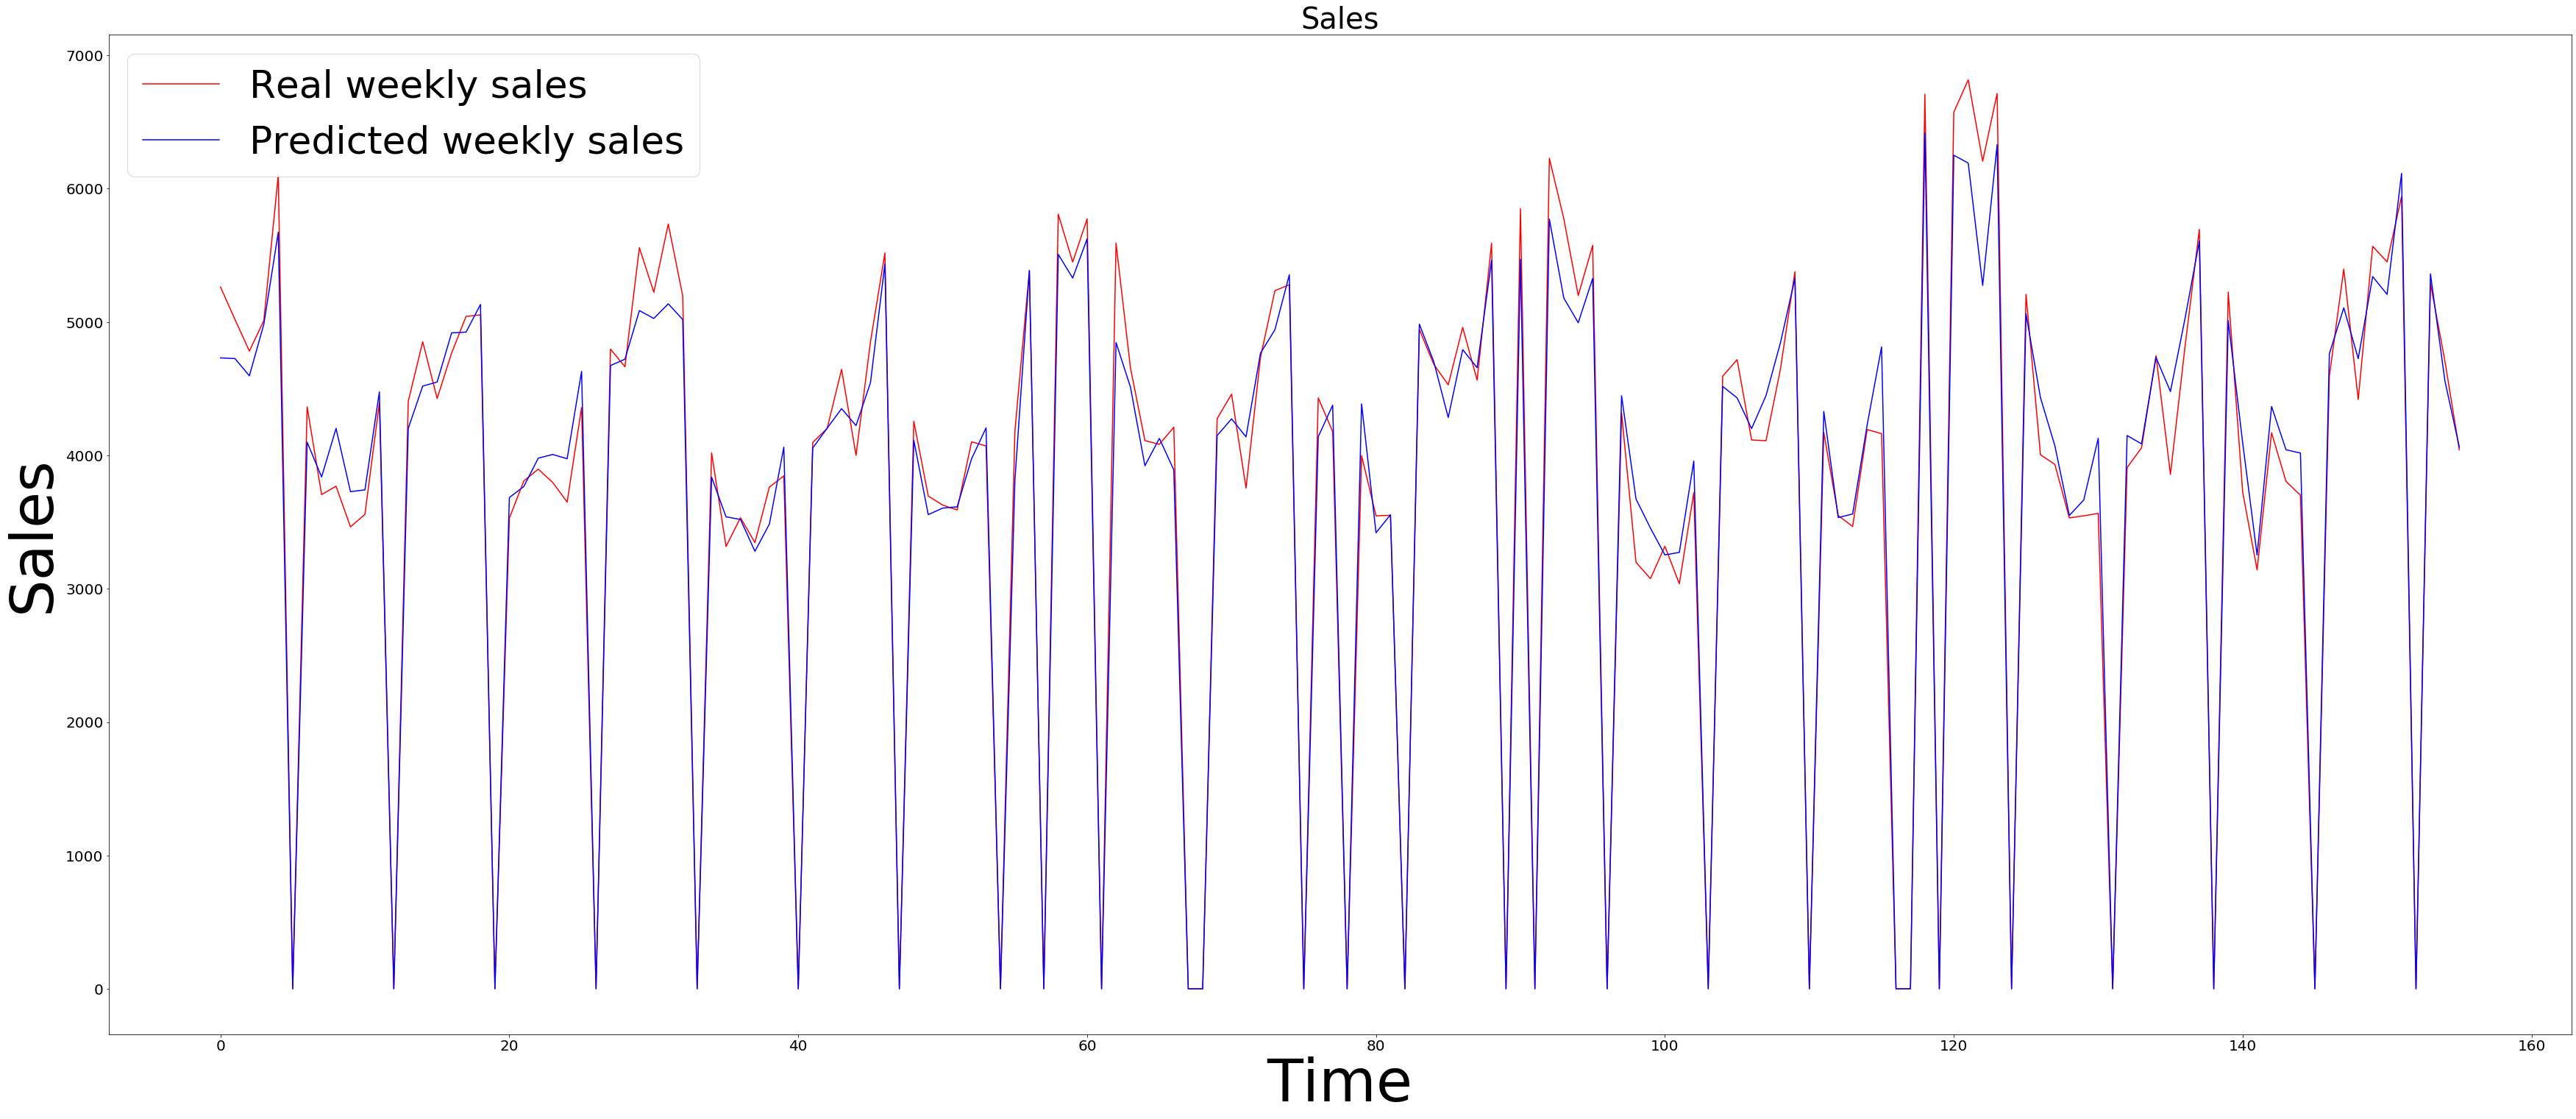

In [246]:
plt.rcParams.update({'font.size': 30})
fontP = FontProperties()
fontP.set_size('xx-large')

plt.subplots(figsize=(60,25))
plt.plot(observed_weekly_sales,color='red',label='Real weekly sales')
plt.plot(predicted_weekly_sales,color='blue',label='Predicted weekly sales')
plt.title('Sales', fontsize=40)
plt.xlabel('Time', fontsize=80)
plt.ylabel('Sales', fontsize=80)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),
           prop = fontP,fancybox=True,shadow=False)

plt.show()

# Model Evaluations lstm

In [370]:
test_set = test_set.reset_index()
test_set.head()

,Date,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,2015-07-31,1,5,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5263
1,2015-07-30,1,4,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5020
2,2015-07-29,1,3,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4782
3,2015-07-28,1,2,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5011
4,2015-07-27,1,1,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,6102


In [375]:
#weight = np.where(test_set['IsHoliday_x']==0, 1, 5)

#df = pd.DataFrame({"Date": test_set['Date'],
 #                  "Weight": weight,
  #                 "Observed_Values":observed_weekly_sales.reshape(observed_weekly_sales.shape[0]),
  #                "Predicted_Values":predicted_weekly_sales.reshape(predicted_weekly_sales.shape[0])})

#df['Derived'] = df['Weight']*abs(df['Observed_Values']-df['Predicted_Values'])

#df.head()

In [ ]:
#WMAE = sum(df['Derived']) / sum(df['Weight'])
#WMAE

In [372]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

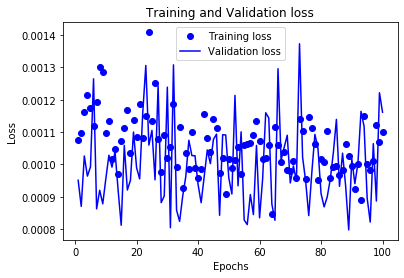

In [373]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

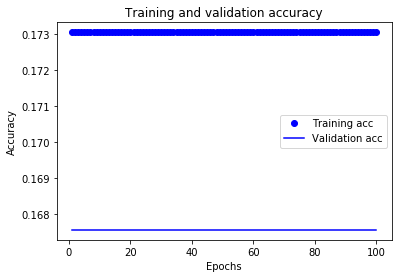

In [374]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del(model2)

# Time Series Analysis using Arima Model

In [219]:
sales_data = pd.DataFrame(df_train[ (df_train['Sales'] !=0) & (df_train['Store']==1) ].loc[:,'Sales'])

In [220]:
sales_data.head(5)

,Sales
Date,
2013-01-02,4422
2013-01-03,4159
2013-01-04,4484
2013-01-05,2342
2013-01-07,6775


Data points used for training :  784


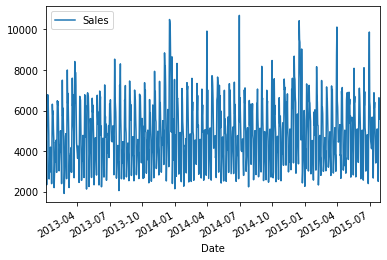

In [221]:
train=sales_data
#test = sales_data.loc['2015']
print("Data points used for training : ",len(train))
#print("Data points used for test : ",len(test))
train.plot()
plt.show()

## DICKY-Fuller Test

<img src="adfuller.png" />

In [62]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

In [63]:
# Run test
result = adfuller(train['Sales'])

In [64]:
print(result)
# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

(-4.089466993953712, 0.0010080882943698146, 13, 592, {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}, 9383.91807697439)
-4.089466993953712
0.0010080882943698146
{'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}


## If data is non-satationary

which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data.
1. ADF value
2. P-value

In [ ]:
'''# Take the first difference of the data
train_diff = train.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(train_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())'''

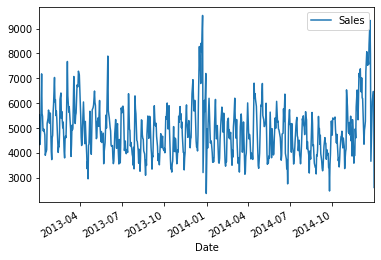

In [65]:
# Plot the time series
fig, ax = plt.subplots()
train.plot(ax=ax)
plt.show()

## ACF VS PACF 

1. ACF - Autocorrelation Function
2. PACF - Partial autocorrelation function
<img src="acf vs pacf.png" />

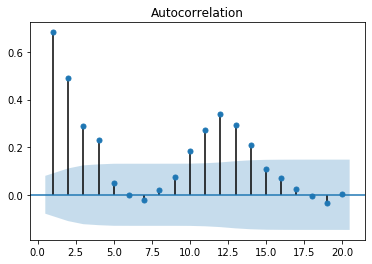

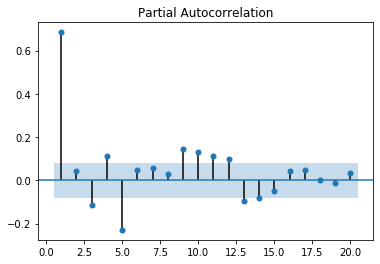

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train, lags=20, zero=False)
plot_pacf(train, lags=20, zero=False)
plt.show()

# ARMA Model

In [67]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(1,1))
result_m = model.fit()

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [68]:
print(result_m.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  606
Model:                     ARMA(1, 1)   Log Likelihood               -4884.032
Method:                       css-mle   S.D. of innovations            765.089
Date:                Fri, 23 Aug 2019   AIC                           9776.065
Time:                        22:12:03   BIC                           9793.692
Sample:                             0   HQIC                          9782.924
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4820.4319    101.334     47.570      0.000    4621.822    5019.042
ar.L1.Sales     0.7038      0.039     17.900      0.000       0.627       0.781
ma.L1.Sales    -0.0306      0.052     -0.587    

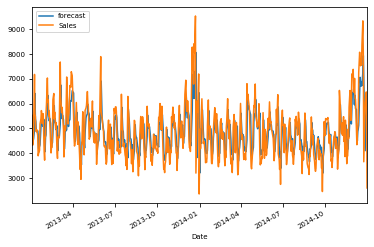

In [107]:
#Forecasting
result_m.plot_predict(start='2013-01-02', end='2014-12-31')
plt.show()

# ARIMA Model

In [135]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [149]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(train, order=(p,0,q), trend='c')
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency informati

In [150]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q           AIC           BIC
8  2  2   9762.445326   9788.886606
7  2  1   9766.937814   9788.972214
5  1  2   9772.467506   9794.501906
3  1  0   9774.412859   9787.633499
6  2  0   9775.947780   9793.575300
4  1  1   9776.162092   9793.789612
2  0  2   9779.282545   9796.910065
1  0  1   9927.406701   9940.627341
0  0  0  10157.451296  10166.265056
   p  q           AIC           BIC
3  1  0   9774.412859   9787.633499
8  2  2   9762.445326   9788.886606
7  2  1   9766.937814   9788.972214
6  2  0   9775.947780   9793.575300
4  1  1   9776.162092   9793.789612
5  1  2   9772.467506   9794.501906
2  0  2   9779.282545   9796.910065
1  0  1   9927.406701   9940.627341
0  0  0  10157.451296  10166.265056


In [184]:
# Now after searching p and q apply to the model
model_s = SARIMAX(train, order=(2,0,2), trend='c')
result_s = model_s.fit()

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [185]:
# Generate predictions
one_step_forecast = result_s.get_prediction(start=-100)

# Make ARIMA forecast of next 10 values
arima_value_forecast = result_s.get_forecast(steps=10)

/home/omen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [186]:
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

In [187]:
# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

In [188]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate  predictions
print(mean_forecast)

Date
2014-09-03    5051.712652
2014-09-04    4811.165084
2014-09-05    4535.142482
2014-09-06    4573.345453
2014-09-08    4278.622711
                 ...     
2014-12-24    7346.335616
2014-12-27    3929.382544
2014-12-29    5344.080811
2014-12-30    6575.580621
2014-12-31    5773.677536
Length: 100, dtype: float64


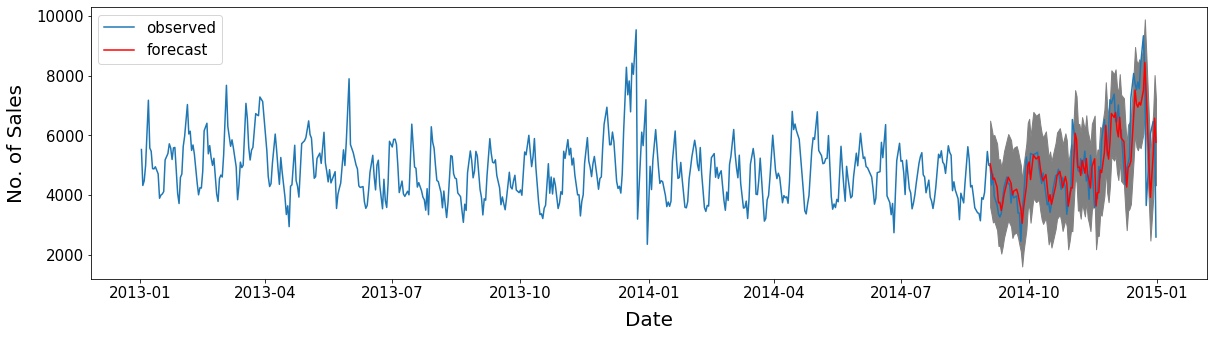

In [189]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,5))
# plot the amazon data
plt.plot(train.index, train, label='observed')
# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='grey')
plt.xlabel('Date', labelpad=10, fontsize=20)
plt.ylabel('No. of Sales', labelpad=10, fontsize=20 )
plt.legend()
plt.show()

## AIC - Akaike information criterion


1. Lower AIC indicates a better model
2. AIC likes to choose simple models with lower order

In [190]:
print(result_s.aic)

9762.445326419442


## BIC - Bayesian information criterion


1. Very similar to AIC
2. Lower BIC indicates a better model
3. BIC likes to choose simple models with lower order

In [191]:
print(result_s.bic)

9788.886606335858


## Model diagnostics

In [192]:
# Assign residuals to variable
residuals = result_s.resid

In [193]:
mae = np.mean(np.abs(residuals))
print(mae)

535.3103104084511


### Plot diagnostics


If the model ts well the residuals will be white
Gaussian noise
<img src="plot_diagnostics.png" />

<Figure size 720x144 with 0 Axes>

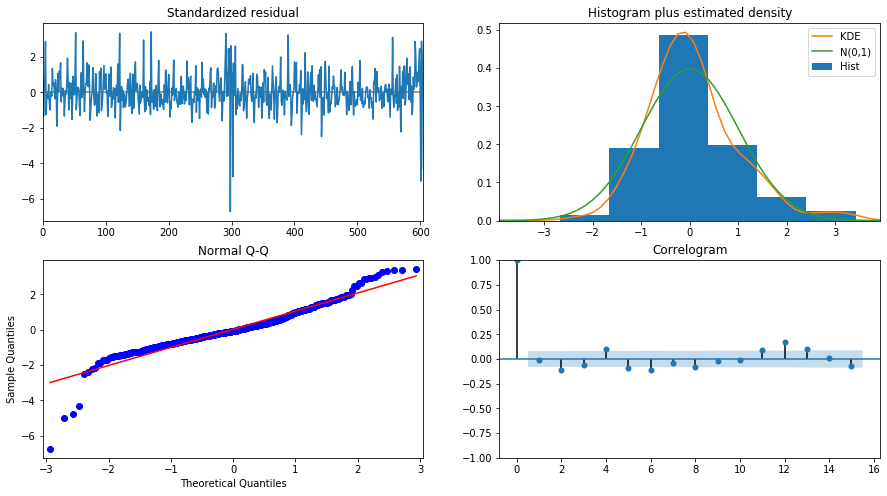

In [194]:
# Create the 4 diagostics plots
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,2))

result_s.plot_diagnostics(figsize=(15, 8), lags=15)
plt.show()

In [195]:
print(result_s.summary())

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                  606
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4875.223
Date:                Fri, 23 Aug 2019   AIC                           9762.445
Time:                        23:39:12   BIC                           9788.887
Sample:                             0   HQIC                          9772.734
                                - 606                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1881.0451    303.848      6.191      0.000    1285.515    2476.575
ar.L1         -0.0614      0.069     -0.885      0.376      -0.197       0.075
ar.L2          0.6632      0.064     10.289      0.0

<img src="prob(Q, JB).png" />

## Unrolling ARMA forecast

In [ ]:
'''# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)'''